In [1]:
pip install sonar

In [2]:
pip install hatesonar

     |████████████████████████████████| 883 kB 13.7 MB/s 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import _pickle as pickle

from hatesonar import Sonar 


import warnings
warnings.filterwarnings('ignore')

In [4]:
# tweets about electric cars
df = pd.read_pickle('/content/drive/MyDrive/Capstone_electriccar/sentiment_analysis_vader_results.pkl')

In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df.shape

(33390, 6)

In [7]:
df.head()


,Tweet Text,negative,neutral,positive,compound,sentiment
0,Join our next webinar on 'Alternative Fuel Typ...,0.0,0.879,0.121,0.296,1
1,RT @events_wisdom: How the #hydrogen productio...,0.0,0.891,0.109,0.296,1
2,How the #hydrogen production techniques are im...,0.0,0.885,0.115,0.296,1
3,RT @events_wisdom: Join our upcoming event to ...,0.0,0.885,0.115,0.296,1
4,RT @HELLENICSHIP: Stena Line achieves another ...,0.0,1.000,0.000,0.000,0


In [8]:
df.describe()

,negative,neutral,positive,compound,sentiment
count,33390.000000,33390.000000,33390.000000,33390.000000,33390.000000
mean,0.025919,0.859790,0.114291,0.204326,0.366128
std,0.067430,0.148108,0.139552,0.361780,0.665127
min,0.000000,0.203000,0.000000,-0.954500,-1.000000
25%,0.000000,0.761000,0.000000,0.000000,0.000000
50%,0.000000,0.875000,0.044500,0.000000,0.000000
75%,0.000000,1.000000,0.200000,0.492700,1.000000
max,0.737000,1.000000,0.785000,0.979000,1.000000


In [9]:
type(df['Tweet Text'][1])

str

### Function to classify Tweets

In [10]:
# Create an object of Sonar Hate Speech Detection
sonar = Sonar()

In [11]:
Class = []
hate = []
offensive = []
neither = []

In [12]:
def hate_speech_classifier(df, Class, hate, offensive, neither):
    for i in df['Tweet Text']:
        sonar_dict = sonar.ping(text=i)
        Class.append(list(sonar_dict.values())[1])
        hate.append(list(list(sonar_dict.values())[2][0].values())[1])
        offensive.append(list(list(sonar_dict.values())[2][1].values())[1])
        neither.append(list(list(sonar_dict.values())[2][2].values())[1])

In [13]:
# Function calling 
hate_speech_classifier(df, Class, hate, offensive, neither)

In [14]:
# Prepare columns to add the scores later
df["Class"] = Class
df["hate"] = hate
df["offensive"] = offensive
df["neither"] = neither

In [15]:
df.Class.value_counts()

neither               32918
offensive_language      467
hate_speech               5
Name: Class, dtype: int64

In [16]:
467/(df.Class.value_counts()[-1] + df.Class.value_counts()[1])

0.989406779661017

### Number of Tweets by Hate Speech Classification

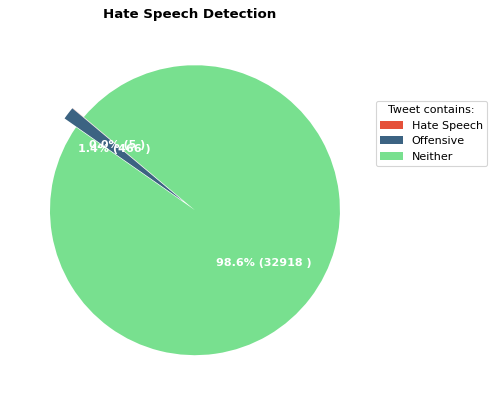

In [17]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [df.Class.value_counts()[-1], df.Class.value_counts()[1], df.Class.value_counts()[0]]
categories = ['Hate Speech', 'Offensive', 'Neither']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Tweet contains:", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Hate Speech Detection", fontsize=12, fontweight="bold")
plt.show()

### Histogram

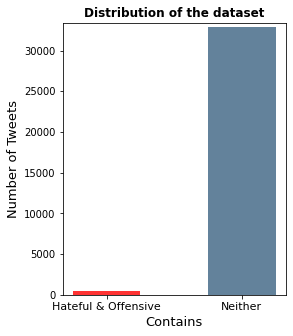

In [18]:
labels = ['Hateful & Offensive', 'Neither']
freq = [df.Class.value_counts()[-1] + df.Class.value_counts()[1], df.Class.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(4,5))
plt.bar(index, freq, alpha=0.8, width=0.5, color=['red','#3c6382','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Distribution of the dataset", fontsize=12, fontweight="bold")
plt.ylim(0, len(df['Tweet Text']))
plt.show()

In [19]:
labels = ['Hate Speech', 'Offensive Language']
freq1 = [df.Class.value_counts()[-1], df.Class.value_counts()[1]]
index1 = np.arange(len(freq1))

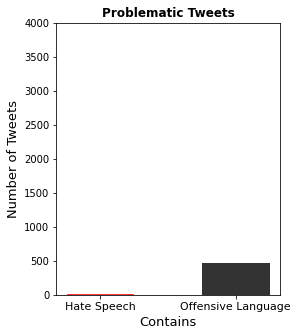

In [20]:
plt.figure(figsize=(4,5))
plt.bar(index1, freq1, alpha=0.8, width=0.5, color=['red','black'])
plt.xlabel('Contains', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, labels, fontsize=11) 
plt.title("Problematic Tweets", fontsize=12, fontweight="bold")
plt.ylim(0, 4000)
plt.show()

###  Seperate the dataset accordingly to contining hateful speech, offensive language and neither

In [21]:
df_hate = df[df['Class']=='hate_speech']
df_offensive = df[df['Class']=='offensive_language']
df_neither = df[df['Class']=='neither']

In [22]:
df_neither.sentiment.value_counts()

 1    15587
 0    13957
-1     3374
Name: sentiment, dtype: int64

In [23]:
df_offensive.sentiment.value_counts()

 0    186
 1    147
-1    134
Name: sentiment, dtype: int64

### no hate speech found, analyzed offensive and neutral tweets

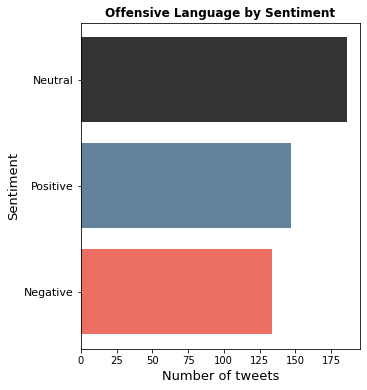

In [24]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_offensive.sentiment.value_counts()[-1], df_offensive.sentiment.value_counts()[1], df_offensive.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 2: Sentiment of Tweets classified as Offensive
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Offensive Language by Sentiment", fontsize=12, fontweight="bold")
plt.show()

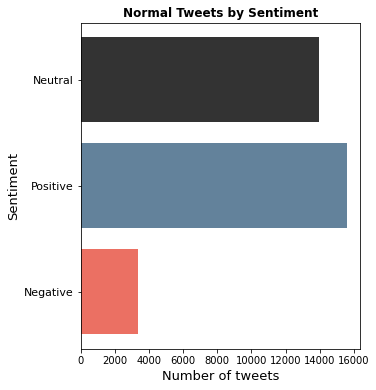

In [25]:
labels = ['Negative', 'Positive', 'Neutral']
freq = [df_neither.sentiment.value_counts()[-1], df_neither.sentiment.value_counts()[1], df_neither.sentiment.value_counts()[0]]
index = np.arange(len(freq))

plt.figure(figsize=(5,6))

# Chart 3: Sentiment of Tweets classified as Neither
plt.barh(index, freq, alpha=0.8, color=['#e74c3c','#3c6382','black'])
plt.xlabel('Number of tweets', fontsize=13)
plt.ylabel('Sentiment', fontsize=13)
plt.yticks(index, labels, fontsize=11) 
plt.title("Normal Tweets by Sentiment", fontsize=12, fontweight="bold")
plt.show()

### Scatter Plot of Hate Score

<Figure size 1440x360 with 0 Axes>

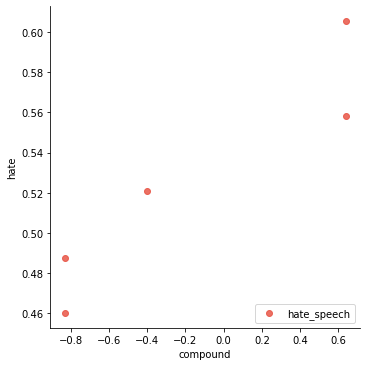

In [26]:
# Provide a dictionary to the palette argument
plt.figure(figsize=(20,5))
sns.lmplot( x="compound", y="hate", data=df_hate, fit_reg=False, hue='Class', legend=False, palette=dict(neither="black", offensive_language="#3c6382", hate_speech="#e74c3c"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.show()

### Top 10 Hateful Tweets

In [27]:
df_hate.sort_values('hate', inplace=True, ascending=False)

In [28]:
df_hate.reset_index(drop=True, inplace=True)

In [29]:
df_hate.head(10)

,Tweet Text,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,@RyanBaer2003 Love to see you in Geen &amp; Wh...,0.000,0.704,0.296,0.6369,1,hate_speech,0.605398,0.371869,0.022733
1,RT @Rfredrickson59: @RyanBaer2003 Love to see ...,0.000,0.724,0.276,0.6369,1,hate_speech,0.558067,0.418802,0.023131
2,Mr White #model3 distracted me from seeing Mrs...,0.144,0.856,0.000,-0.4003,-1,hate_speech,0.520882,0.419782,0.059336
3,RT @sascha_p: Ganz objektiv gesehen baut #Merc...,0.302,0.698,0.000,-0.8316,-1,hate_speech,0.487749,0.084391,0.427860
4,Ganz objektiv gesehen baut #MercedesBenz einfa...,0.328,0.672,0.000,-0.8316,-1,hate_speech,0.460121,0.080743,0.459137


###  Top 10 Offensive Tweets

In [30]:
df_offensive.sort_values('offensive',inplace=True, ascending=False)

In [31]:
df_offensive.reset_index(drop=True, inplace=True)

In [32]:
df_offensive.head(10)

,Tweet Text,negative,neutral,positive,compound,sentiment,Class,hate,offensive,neither
0,Punkass dealers \n\n@HoffmanAutoGrp\n\nNever u...,0.281,0.719,0.0,-0.5994,-1,offensive_language,0.005776,0.993687,0.000537
1,RT @lalala4202: Cryptocurrencies are appraisin...,0.196,0.804,0.0,-0.5994,-1,offensive_language,0.008588,0.991408,0.000004
2,Cryptocurrencies are appraising bitches in fic...,0.187,0.813,0.0,-0.5994,-1,offensive_language,0.009133,0.990864,0.000003
3,@PUSSYFinancial Nuevo en este mundo? compra $P...,0.000,1.000,0.0,0.0000,0,offensive_language,0.011483,0.987823,0.000694
4,"@PUSSYFinancial si $PUSSY es lo mejor, ky por...",0.000,1.000,0.0,0.0000,0,offensive_language,0.020966,0.958698,0.020337
5,RT @AffiliateTiki: With all @elonmusk twitts a...,0.231,0.769,0.0,-0.5574,-1,offensive_language,0.034892,0.956658,0.008450
6,Shit on ya bday cake put my money back and sto...,0.303,0.697,0.0,-0.7263,-1,offensive_language,0.030679,0.954627,0.014695
7,With all @elonmusk twitts about #GreenEnergy ♻...,0.247,0.753,0.0,-0.5574,-1,offensive_language,0.037618,0.954113,0.008269
8,This shit is all unnecessary if we all had Tes...,0.280,0.720,0.0,-0.5983,-1,offensive_language,0.039901,0.945830,0.014268
9,RT @ugliestduck: can't wait to purchase my #te...,0.296,0.704,0.0,-0.7430,-1,offensive_language,0.033438,0.944966,0.021596


### Trying on Specific Tweets

In [33]:
list(sonar.ping(text=df['Tweet Text'].iloc[189]).values())

['Christian Keller @ChfKeller bei @IBMDACH erzählt von der Front - IBM seit 110 Jahren dabei, wenn es um Pionierarbei… https://t.co/rLs4ufWE4V',
 'neither',
 [{'class_name': 'hate_speech', 'confidence': 0.03945320844208391},
  {'class_name': 'offensive_language', 'confidence': 0.33037608806864915},
  {'class_name': 'neither', 'confidence': 0.630170703489267}]]

In [34]:
sonar.ping(text="At least I'm not beautiful")

{'classes': [{'class_name': 'hate_speech', 'confidence': 0.03721542824393398},
  {'class_name': 'offensive_language', 'confidence': 0.36149194189180184},
  {'class_name': 'neither', 'confidence': 0.6012926298642641}],
 'text': "At least I'm not beautiful",
 'top_class': 'neither'}

### Saving Results

In [35]:
df.drop(['negative', 'neutral', 'positive', 'compound', 'sentiment'],axis=1, inplace=True)
df.to_pickle('/content/drive/MyDrive/Capstone_electriccar/hate_speech_results.pkl')